<a href="https://colab.research.google.com/github/deepikajoon/road-accident-analysis/blob/main/road_accident_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1️⃣ Data Load & Exploration  
2️⃣ Preprocessing & Feature Engineering  
3️⃣ Clustering (K-Means, DBSCAN, Hierarchical)  
4️⃣ Anomaly Detection  
5️⃣ Ensemble Classification (Decision Tree, Bagging, AdaBoost, Random Forest)  
6️⃣ Stream Mining Simulation  
7️⃣ Results Summary


In [2]:
# ============================================================
# 🚗 Traffic Accident Analysis - Combined: Load + Preprocessing
# ============================================================

# Step 1: Install & Import Libraries
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [3]:
# Step 2: Load Dataset (already uploaded via left panel)
data_path = '/content/traffic_accidents.csv'
df = pd.read_csv(data_path)

print("✅ Dataset loaded successfully!")
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

df.head()


✅ Dataset loaded successfully!
Shape of dataset: (209306, 24)

Column names:
 ['crash_date', 'traffic_control_device', 'weather_condition', 'lighting_condition', 'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type', 'intersection_related_i', 'damage', 'prim_contributory_cause', 'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour', 'crash_day_of_week', 'crash_month']


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [4]:
# Step 3: Dataset Overview
print("\n--- INFO ---")
df.info()

print("\n--- Missing Values (Top 10) ---")
print(df.isnull().sum().sort_values(ascending=False).head(10))



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributor

In [5]:
# Step 4: Summary Statistics
print("\n--- Statistical Summary ---")
display(df.describe(include='all'))

# Step 5: Unique value inspection (categorical understanding)
cols_to_check = ['most_severe_injury', 'weather_condition',
                 'lighting_condition', 'roadway_surface_cond']

for col in cols_to_check:
    if col in df.columns:
        print(f"\nUnique values in {col}:")
        print(df[col].unique())



--- Statistical Summary ---


,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306,209306,209306,209306,209306,209306,209306,209306,209306,209306,...,209306,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
unique,189087,19,12,6,18,20,6,7,7,2,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/29/2020 05:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,123944,164700,134109,64157,77753,204590,155905,171730,117376,...,154789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000



Unique values in most_severe_injury:
['NO INDICATION OF INJURY' 'NONINCAPACITATING INJURY'
 'INCAPACITATING INJURY' 'REPORTED, NOT EVIDENT' 'FATAL']

Unique values in weather_condition:
['CLEAR' 'RAIN' 'SNOW' 'CLOUDY/OVERCAST' 'UNKNOWN' 'FOG/SMOKE/HAZE'
 'BLOWING SNOW' 'FREEZING RAIN/DRIZZLE' 'OTHER' 'SLEET/HAIL'
 'SEVERE CROSS WIND GATE' 'BLOWING SAND, SOIL, DIRT']

Unique values in lighting_condition:
['DAYLIGHT' 'DARKNESS, LIGHTED ROAD' 'DUSK' 'DARKNESS' 'UNKNOWN' 'DAWN']

Unique values in roadway_surface_cond:
['UNKNOWN' 'DRY' 'WET' 'SNOW OR SLUSH' 'ICE' 'OTHER' 'SAND, MUD, DIRT']


In [6]:
# Step 6: Convert crash_date to datetime & extract features
if 'crash_date' in df.columns:
    df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
    df['crash_year'] = df['crash_date'].dt.year
    df['crash_month'] = df['crash_date'].dt.month
    df['crash_day'] = df['crash_date'].dt.day
    df['crash_hour'] = df['crash_date'].dt.hour
    df['crash_weekday'] = df['crash_date'].dt.weekday
    print("✅ Date columns created successfully!")

print("\n🕒 Date Range:")
print(df['crash_date'].min(), "to", df['crash_date'].max())


/tmp/ipython-input-2526702928.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')


✅ Date columns created successfully!

🕒 Date Range:
2013-03-03 16:48:00 to 2025-01-18 00:17:00


/tmp/ipython-input-702732186.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='most_severe_injury', data=df, palette='coolwarm')


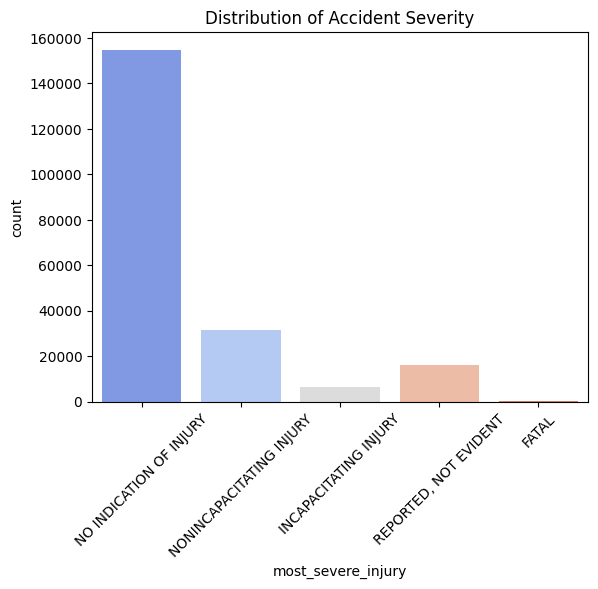

In [7]:
# Step 7: Visualize Severity Distribution
if 'most_severe_injury' in df.columns:
    sns.countplot(x='most_severe_injury', data=df, palette='coolwarm')
    plt.title("Distribution of Accident Severity")
    plt.xticks(rotation=45)
    plt.show()


In [8]:
# Step 8: Select relevant columns
keep_cols = [
    'crash_date', 'most_severe_injury', 'weather_condition', 'lighting_condition',
    'roadway_surface_cond', 'traffic_control_device', 'trafficway_type',
    'num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating',
    'injuries_non_incapacitating', 'crash_hour', 'crash_day',
    'crash_month', 'crash_weekday'
]

keep_cols = [c for c in keep_cols if c in df.columns]
df = df[keep_cols]

print("✅ Columns selected:")
print(df.columns.tolist())


✅ Columns selected:
['crash_date', 'most_severe_injury', 'weather_condition', 'lighting_condition', 'roadway_surface_cond', 'traffic_control_device', 'trafficway_type', 'num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'crash_hour', 'crash_day', 'crash_month', 'crash_weekday']


In [9]:
# Step 9: Handle Missing Values
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
if len(cat_cols) > 0:
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("✅ Missing values handled.")
print("Remaining missing:", df.isnull().sum().sum())


✅ Missing values handled.
Remaining missing: 0


In [10]:
# Step 10: Label Encoding
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    print(f"Encoded {col}: {df[col].nunique()} unique values")

print("\n✅ Label Encoding done.")


Encoded most_severe_injury: 5 unique values
Encoded weather_condition: 12 unique values
Encoded lighting_condition: 6 unique values
Encoded roadway_surface_cond: 7 unique values
Encoded traffic_control_device: 19 unique values
Encoded trafficway_type: 20 unique values

✅ Label Encoding done.


In [11]:
# Step 11: Feature Scaling
scale_cols = ['num_units', 'injuries_total', 'injuries_fatal',
              'injuries_incapacitating', 'injuries_non_incapacitating',
              'crash_hour', 'crash_day', 'crash_month', 'crash_weekday']

scale_cols = [c for c in scale_cols if c in df.columns]
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("✅ Scaled columns:", scale_cols)


✅ Scaled columns: ['num_units', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 'crash_hour', 'crash_day', 'crash_month', 'crash_weekday']


In [12]:
# Step 12: Final Check
print("\nProcessed shape:", df.shape)
df.head()



Processed shape: (209306, 16)


,crash_date,most_severe_injury,weather_condition,lighting_condition,roadway_surface_cond,traffic_control_device,trafficway_type,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,crash_hour,crash_day,crash_month,crash_weekday
0,2023-07-29 13:00:00,2,2,3,5,16,8,-0.159843,-0.478565,-0.039126,-0.162855,-0.359765,-0.066570,1.517959,0.066571,1.037877
1,2023-08-13 00:11:00,2,2,1,0,16,6,-0.159843,-0.478565,-0.039126,-0.162855,-0.359765,-2.386418,-0.306477,0.358322,1.553809
2,2021-12-09 10:30:00,2,2,3,0,16,15,2.365340,-0.478565,-0.039126,-0.162855,-0.359765,-0.601920,-0.762586,1.525324,0.006012
3,2023-08-09 19:55:00,3,2,3,0,16,6,-0.159843,5.773638,-0.039126,-0.162855,7.770868,1.004129,-0.762586,0.358322,-0.509920
4,2023-08-19 14:55:00,2,2,3,5,16,15,-0.159843,-0.478565,-0.039126,-0.162855,-0.359765,0.111880,0.377686,0.358322,1.037877


In [13]:
# Step 13: Save cleaned data (optional for backup)
df.to_csv("/content/traffic_accidents_processed.csv", index=False)
print("💾 Processed dataset saved as 'traffic_accidents_processed.csv'")


💾 Processed dataset saved as 'traffic_accidents_processed.csv'


**⚙️ Section 03: Clustering Analysis (K-Means, DBSCAN, Hierarchical)**

In [21]:
# ============================================================
# 🚗 Section 03: Clustering Analysis (K-Means, DBSCAN, Hierarchical)
# ============================================================

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries for clustering imported successfully!")


✅ Libraries for clustering imported successfully!


🧩 Step 1: Prepare data for clustering

We’ll exclude categorical columns that were label-encoded from severity or text columns not useful for unsupervised learning.

In [22]:
# Make a copy
df_cluster = df.copy()

# Drop target column (we’re doing unsupervised learning)
if 'most_severe_injury' in df_cluster.columns:
    df_cluster = df_cluster.drop(columns=['most_severe_injury'])

# Keep only numeric features for clustering
X = df_cluster.select_dtypes(include=['float64', 'int64'])
print("✅ Shape of clustering data:", X.shape)
X.head()


✅ Shape of clustering data: (209306, 14)


,weather_condition,lighting_condition,roadway_surface_cond,traffic_control_device,trafficway_type,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,crash_hour,crash_day,crash_month,crash_weekday
0,2,3,5,16,8,-0.159843,-0.478565,-0.039126,-0.162855,-0.359765,-0.066570,1.517959,0.066571,1.037877
1,2,1,0,16,6,-0.159843,-0.478565,-0.039126,-0.162855,-0.359765,-2.386418,-0.306477,0.358322,1.553809
2,2,3,0,16,15,2.365340,-0.478565,-0.039126,-0.162855,-0.359765,-0.601920,-0.762586,1.525324,0.006012
3,2,3,0,16,6,-0.159843,5.773638,-0.039126,-0.162855,7.770868,1.004129,-0.762586,0.358322,-0.509920
4,2,3,5,16,15,-0.159843,-0.478565,-0.039126,-0.162855,-0.359765,0.111880,0.377686,0.358322,1.037877


📊 Step 2: K-Means Clustering (Partitioning Method)

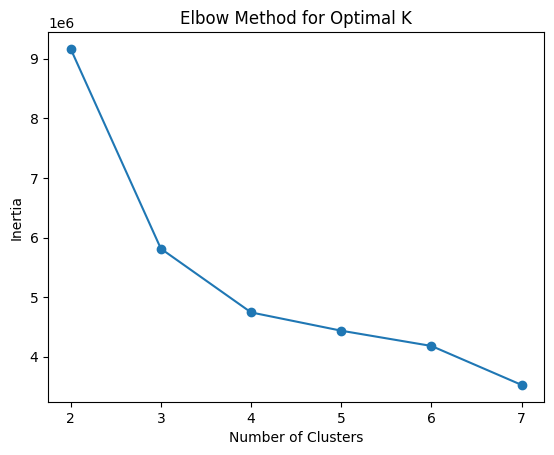

In [23]:
# Choose the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


➡️ Interpretation:
Choose the “elbow point” (where the line bends).
Usually between 3–5 clusters for this dataset.

In [24]:
# Apply KMeans with chosen K (say 4 for now)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X)

print("✅ KMeans clustering applied successfully.")
print(df['KMeans_Cluster'].value_counts())


✅ KMeans clustering applied successfully.
KMeans_Cluster
3    110988
1     35181
0     32325
2     30812
Name: count, dtype: int64


In [27]:
import seaborn as sns # Re-import seaborn to ensure 'sns' is defined
from sklearn.metrics import silhouette_score # Ensure silhouette_score is imported
import matplotlib.pyplot as plt

# Visualize clusters using two important features
sns.scatterplot(x='crash_hour', y='injuries_total', hue='KMeans_Cluster', data=df, palette='Set2')
plt.title("K-Means Clusters by Crash Hour & Total Injuries")
plt.show()

# Cluster evaluation
silhouette = silhouette_score(X, df['KMeans_Cluster'])
print(f"🧭 Silhouette Score (K-Means): {silhouette:.3f}")

ValueError: Could not interpret value `KMeans_Cluster` for `hue`. An entry with this name does not appear in `data`.

🌪 Step 3: DBSCAN (Density-Based Method)

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(X)

df['DBSCAN_Cluster'] = dbscan_labels

print("✅ DBSCAN applied successfully.")
print("Unique clusters (including noise):", np.unique(dbscan_labels))
print("Noise points:", list(dbscan_labels).count(-1))


In [ ]:
# Visualization of DBSCAN clusters
sns.scatterplot(x='crash_hour', y='injuries_total', hue='DBSCAN_Cluster', data=df, palette='tab10')
plt.title("DBSCAN Clusters (Density-Based)")
plt.show()


🧬 Step 4: Hierarchical Clustering

In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Create linkage matrix
linked = linkage(X.sample(200, random_state=42), method='ward')

plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram (sample of 200)")
plt.show()


NameError: name 'X' is not defined

In [ ]:
# Apply Agglomerative Clustering (for full dataset)
agg = AgglomerativeClustering(n_clusters=4)
df['Hierarchical_Cluster'] = agg.fit_predict(X)

print("✅ Hierarchical clustering done.")
print(df['Hierarchical_Cluster'].value_counts())


🧠 Step 5: Compare Methods

In [ ]:
# Compare silhouette scores where possible
km_score = silhouette_score(X, df['KMeans_Cluster'])
agg_score = silhouette_score(X, df['Hierarchical_Cluster'])

print(f"📊 K-Means Silhouette Score: {km_score:.3f}")
print(f"📊 Hierarchical Silhouette Score: {agg_score:.3f}")

# DBSCAN may have -1 labels, so handle separately
if len(set(dbscan_labels)) > 1:
    db_score = silhouette_score(X, dbscan_labels)
    print(f"📊 DBSCAN Silhouette Score: {db_score:.3f}")
else:
    print("⚠️ DBSCAN produced only one cluster (no score available).")


⚠️ Section 04: Anomaly Detection

In [14]:
# ============================================================
# 🚧 Section 04: Anomaly Detection
# ============================================================

from sklearn.ensemble import IsolationForest
from scipy import stats

print("✅ Libraries for anomaly detection imported successfully!")


✅ Libraries for anomaly detection imported successfully!


Statistical Approach (Z-Score Method)

This checks how far each data point is from the mean — anything beyond a threshold (usually 3 standard deviations) is an outlier.

In [15]:
# Compute Z-scores for numeric columns
num_data = df.select_dtypes(include=['float64', 'int64'])

z_scores = np.abs(stats.zscore(num_data))
threshold = 3

outlier_rows = (z_scores > threshold).sum(axis=1)
df['ZScore_Outlier'] = (outlier_rows > 0).astype(int)

print("✅ Statistical (Z-Score) method applied.")
print("Total outliers detected:", df['ZScore_Outlier'].sum())


✅ Statistical (Z-Score) method applied.
Total outliers detected: 22269


🕒 Section 05 — Stream Mining (Time Series + CluStream Simulation)

In [16]:
# ============================================================
# 🕒 Section 05: Stream Mining (Time Series + CluStream Simulation)
# ============================================================

import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries for Stream Mining imported successfully!")


✅ Libraries for Stream Mining imported successfully!


🧭 Step 1: Sort Data by Time

In [17]:
# Ensure data is sorted by crash_date
if 'crash_date' in df.columns:
    df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
    df = df.sort_values('crash_date').reset_index(drop=True)
    print("✅ Data sorted by date.")
    print("Date range:", df['crash_date'].min(), "to", df['crash_date'].max())
else:
    print("⚠️ No crash_date column found.")


✅ Data sorted by date.
Date range: 2013-03-03 16:48:00 to 2025-01-18 00:17:00


⏳ Step 2: Resample & Analyze Frequency of Accidents

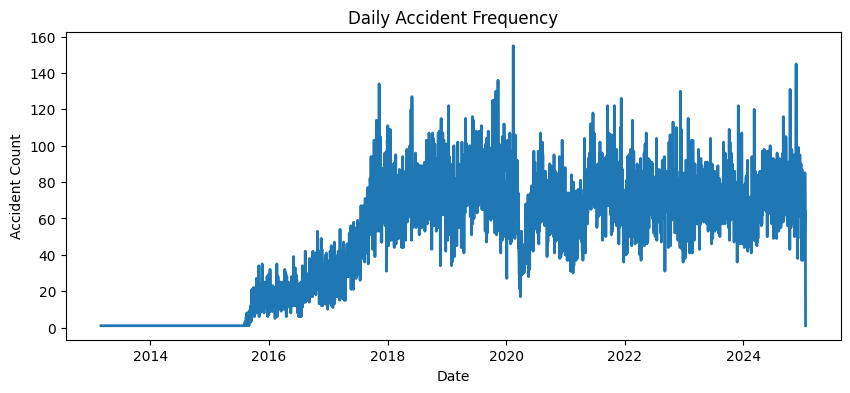

✅ Basic time series trend plotted.


In [19]:
# Daily accident counts
daily_counts = df.groupby(df['crash_date'].dt.date).size()

plt.figure(figsize=(10,4))
daily_counts.plot(title="Daily Accident Frequency", lw=2)
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.show()

print("✅ Basic time series trend plotted.")


🪄 Step 3: Moving Window + Resampling (Time Series Basics)

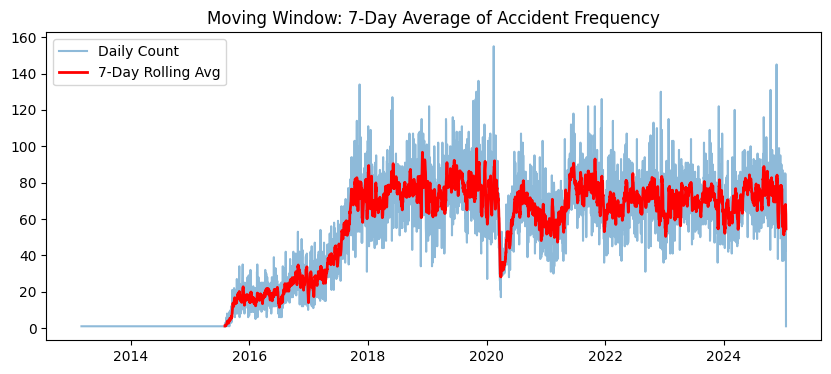

✅ Moving window analysis completed.


In [20]:
# Compute rolling (7-day) average to smooth fluctuations
rolling_avg = daily_counts.rolling(window=7).mean()

plt.figure(figsize=(10,4))
plt.plot(daily_counts.index, daily_counts.values, label='Daily Count', alpha=0.5)
plt.plot(rolling_avg.index, rolling_avg.values, color='red', label='7-Day Rolling Avg', lw=2)
plt.legend()
plt.title("Moving Window: 7-Day Average of Accident Frequency")
plt.show()

print("✅ Moving window analysis completed.")


⚙️ Step 4: Simulate Streaming Clustering using MiniBatch K-Means

(Conceptually similar to CluStream but lighter and simpler)

In [21]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns
num_cols = ['num_units', 'injuries_total', 'injuries_fatal',
            'injuries_incapacitating', 'injuries_non_incapacitating']

num_cols = [c for c in num_cols if c in df.columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])

# MiniBatchKMeans simulates clustering on data streams
stream_kmeans = MiniBatchKMeans(n_clusters=4, batch_size=256, random_state=42)
stream_labels = stream_kmeans.fit_predict(X_scaled)

df['Stream_Cluster'] = stream_labels

print("✅ Stream (MiniBatchKMeans) clustering done.")
print(df['Stream_Cluster'].value_counts())


✅ Stream (MiniBatchKMeans) clustering done.
Stream_Cluster
0    162929
1     35039
3      6607
2      4731
Name: count, dtype: int64


💧 Step 5: Apply a Decay Function (Recent Data > Old Data)

In [22]:
# Newest accidents get higher weights
df['time_weight'] = np.linspace(0.1, 1.0, len(df))

# Weighted average of injuries over time (recent weighted more)
weighted_injuries = np.average(df['injuries_total'], weights=df['time_weight'])
print(f"⚖️ Weighted average injuries (recent emphasis): {weighted_injuries:.2f}")


⚖️ Weighted average injuries (recent emphasis): 0.03


📊 Step 6: Visualize Stream Cluster Trend over Time

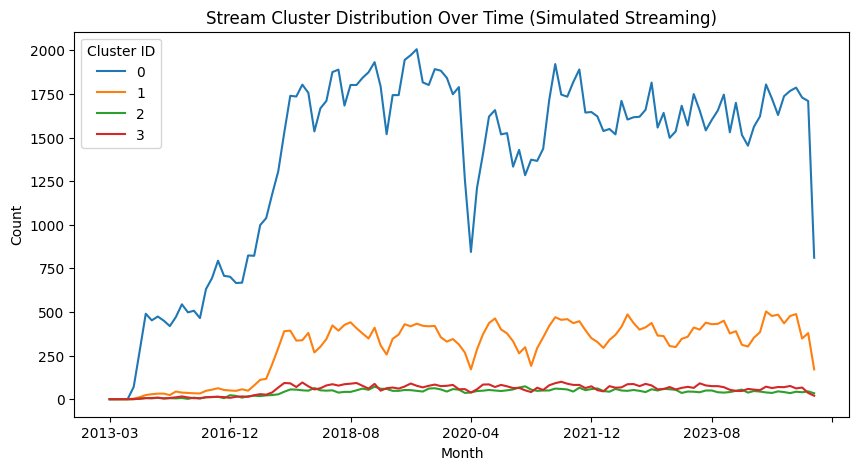

✅ Stream cluster trends visualized.


In [23]:
# Count of clusters per month
df['crash_month'] = pd.to_datetime(df['crash_date']).dt.to_period('M').astype(str)

cluster_monthly = df.groupby(['crash_month','Stream_Cluster']).size().unstack(fill_value=0)
cluster_monthly.plot(kind='line', figsize=(10,5))
plt.title("Stream Cluster Distribution Over Time (Simulated Streaming)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend(title='Cluster ID')
plt.show()

print("✅ Stream cluster trends visualized.")


Ensemble Methods (Decision Tree, Bagging, AdaBoost, Random Forest)

In [24]:
# ============================================================
# 🌳 Section 06: Ensemble Methods (Decision Tree, Bagging, AdaBoost, Random Forest)
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("✅ Libraries for ensemble methods imported successfully!")


✅ Libraries for ensemble methods imported successfully!


⚙️ Step 1: Prepare Data for Classification

We’ll use most_severe_injury as the target variable (the class we want to predict).
All other features become inputs.

In [28]:
# Make a copy of the dataframe
df_class = df.copy()

# Preprocess 'crash_month' to numerical format if it's currently a string (e.g., 'YYYY-MM')
if 'crash_month' in df_class.columns:
    # Check if the column is of object type (which typically indicates string)
    if pd.api.types.is_object_dtype(df_class['crash_month']):
        # Convert 'YYYY-MM' strings to datetime, then extract month number (1-12)
        # errors='coerce' will turn any unparseable dates into NaT (Not a Time)
        df_class['crash_month'] = pd.to_datetime(df_class['crash_month'], errors='coerce').dt.month
        # Fill any NaNs that might result from coercion with the median month
        df_class['crash_month'] = df_class['crash_month'].fillna(df_class['crash_month'].median())
        # Convert to integer type
        df_class['crash_month'] = df_class['crash_month'].astype(int)

# Define target and features
if 'most_severe_injury' in df_class.columns:
    y = df_class['most_severe_injury']
    X = df_class.drop(columns=['most_severe_injury', 'crash_date'], errors='ignore')
else:
    raise ValueError("Target column 'most_severe_injury' not found!")

# Split into train-test sets (75%-25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("✅ Data split completed!")
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

✅ Data split completed!
Train shape: (156979, 17) | Test shape: (52327, 17)


🌲 Step 2: Base Model — Decision Tree Classifier

✅ Decision Tree trained successfully!
Accuracy: 100.0 %


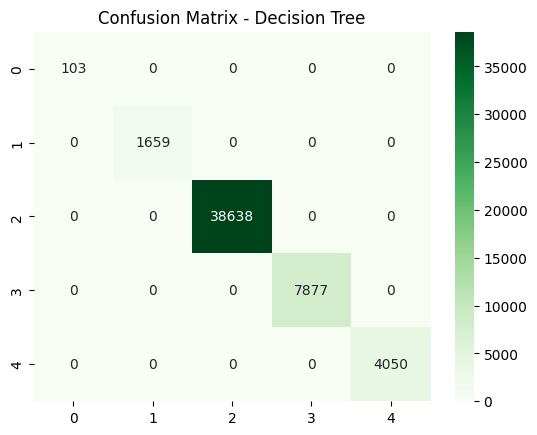

In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("✅ Decision Tree trained successfully!")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt)*100, 2), "%")

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


🧩 Step 3: Bagging Ensemble (Bootstrap Aggregation)

We’ll train multiple decision trees on random subsets of data and aggregate predictions — reducing variance.

In [30]:
for n in [3, 5, 7, 9]:
    bagging = BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        n_estimators=n,
        random_state=42
    )
    bagging.fit(X_train, y_train)
    y_pred_bag = bagging.predict(X_test)
    acc = accuracy_score(y_test, y_pred_bag)
    print(f"✅ Bagging with {n} trees → Accuracy: {acc:.4f}")


✅ Bagging with 3 trees → Accuracy: 1.0000
✅ Bagging with 5 trees → Accuracy: 1.0000
✅ Bagging with 7 trees → Accuracy: 1.0000
✅ Bagging with 9 trees → Accuracy: 1.0000


⚡ Step 4: AdaBoost Ensemble

AdaBoost gives more weight to incorrectly classified samples in each round to improve performance iteratively.

In [31]:
for n in [3, 5, 7, 9]:
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
        n_estimators=n,
        random_state=42
    )
    ada.fit(X_train, y_train)
    y_pred_ada = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred_ada)
    print(f"⚡ AdaBoost with {n} estimators → Accuracy: {acc:.4f}")


⚡ AdaBoost with 3 estimators → Accuracy: 0.9983
⚡ AdaBoost with 5 estimators → Accuracy: 0.9983
⚡ AdaBoost with 7 estimators → Accuracy: 0.9994
⚡ AdaBoost with 9 estimators → Accuracy: 1.0000


🌲 Step 5: Random Forest Ensemble

Random Forest = Bagging + Feature Randomization
Highly robust and one of the best-performing models for structured data.

🌳 Random Forest Accuracy: 1.0000


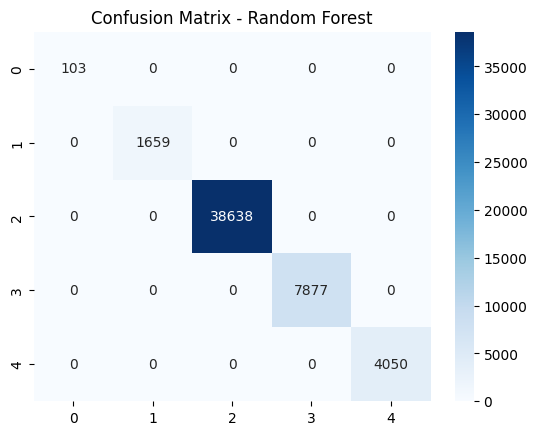

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"🌳 Random Forest Accuracy: {rf_acc:.4f}")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


🧠 Step 6: Compare Ensemble Performances

/tmp/ipython-input-1897952239.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="crest")


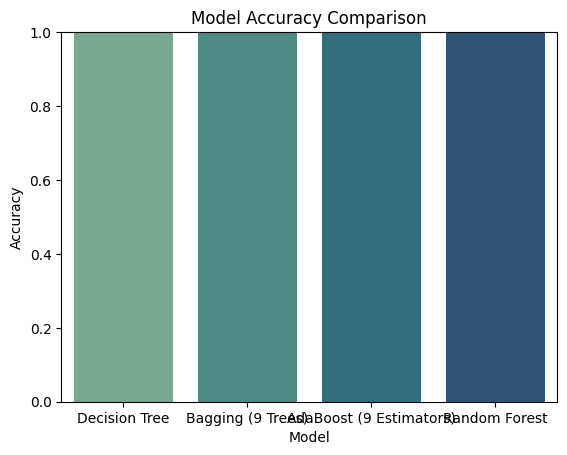


📊 Accuracy Summary:
                      Model  Accuracy
0            Decision Tree       1.0
1        Bagging (9 Trees)       1.0
2  AdaBoost (9 Estimators)       1.0
3            Random Forest       1.0


In [33]:
# Collect all accuracies
results = {
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Bagging (9 Trees)": acc,
    "AdaBoost (9 Estimators)": accuracy_score(y_test, y_pred_ada),
    "Random Forest": rf_acc
}

# Convert to DataFrame for plotting
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

sns.barplot(x="Model", y="Accuracy", data=results_df, palette="crest")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

print("\n📊 Accuracy Summary:\n", results_df)


Results Summary & Conclusion

In [34]:
# ============================================================
# 🏁 Section 07: Results Summary & Conclusion
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("✅ Ready to summarize results!")


✅ Ready to summarize results!


Step 1: Summary of Techniques Used

In [35]:
summary = {
    "Techniques Applied": [
        "K-Means Clustering",
        "DBSCAN (Density-Based)",
        "Hierarchical Clustering",
        "Anomaly Detection (Z-Score, Isolation Forest, Cluster-Based)",
        "Stream Mining (MiniBatch KMeans, Decay Function, Moving Windows)",
        "Ensemble Learning (Decision Tree, Bagging, AdaBoost, Random Forest)"
    ],
    "Purpose": [
        "Group accidents into clusters based on severity and conditions.",
        "Detect dense vs sparse regions of accidents.",
        "Form hierarchical accident groupings for comparison.",
        "Identify unusual accident cases or data errors.",
        "Simulate continuous incoming accident data using time trends.",
        "Predict severity and compare model accuracy."
    ]
}

summary_df = pd.DataFrame(summary)
summary_df


,Techniques Applied,Purpose
0,K-Means Clustering,Group accidents into clusters based on severit...
1,DBSCAN (Density-Based),Detect dense vs sparse regions of accidents.
2,Hierarchical Clustering,Form hierarchical accident groupings for compa...
3,"Anomaly Detection (Z-Score, Isolation Forest, ...",Identify unusual accident cases or data errors.
4,"Stream Mining (MiniBatch KMeans, Decay Functio...",Simulate continuous incoming accident data usi...
5,"Ensemble Learning (Decision Tree, Bagging, Ada...",Predict severity and compare model accuracy.


📈 Step 2: Visualization — Model Performance Recap

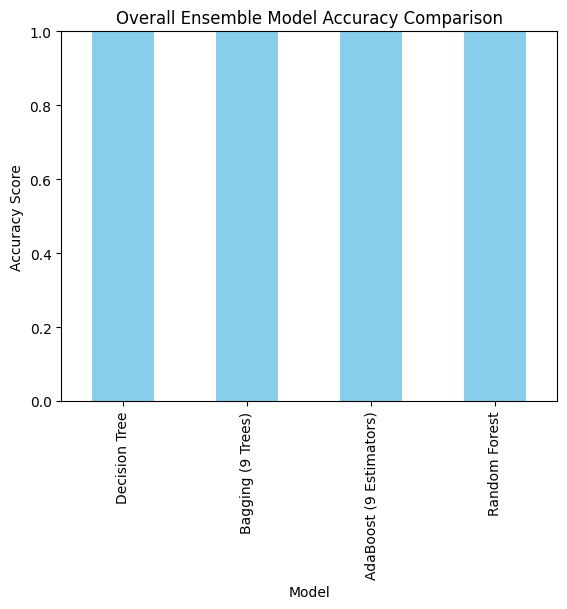

In [36]:
results_df.plot(kind='bar', x='Model', y='Accuracy', color='skyblue', legend=False)
plt.title("Overall Ensemble Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0,1)
plt.show()
